In [226]:
# Import Necessary libraries and packages.
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.svm import SVC
from collections import Counter
import joblib

In [227]:
# Read & Explore the Data.
df = pd.read_csv('Heart Disease Data.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [228]:
# Show Data Shape (# Samples, # Features).
df.shape

(4240, 16)

In [229]:
# Rename column male to sex where (1 : male , 0 : female)
df.rename(columns ={'male':'Sex'}, inplace = True)

In [230]:
# Remove education column because it is not important.
df.drop('education', axis = 1, inplace = True)

In [231]:
# Show More Information about Data (Entries, Data Types, NuLL Values, And Memory Usage).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


In [232]:
# Show Statistical Measure about Data.
df.describe()

,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [233]:
# Check For Nulls.
df.isnull().sum()

Sex                  0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [234]:
# Impute Some important columns like [glucose, heartRate, cigsPerDay]
df['glucose'].fillna(df['glucose'].mean(), inplace= True)
df['heartRate'].fillna(df['heartRate'].mean(), inplace= True)
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(), inplace= True)

In [235]:
# Check Nulls again.
df.isnull().sum()

Sex                 0
age                 0
currentSmoker       0
cigsPerDay          0
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            50
sysBP               0
diaBP               0
BMI                19
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

In [236]:
# Remove Other Rows which have Null Values. 
df.dropna(inplace = True)

In [237]:
# Final Check for Null to ensure Data is Cleaned and has no NULL values.
df.isnull().sum()

Sex                0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [238]:
# Check Shape again.
df.shape

(4120, 15)

TenYearCHD         1.00
age                0.23
sysBP              0.22
prevalentHyp       0.17
diaBP              0.15
glucose            0.12
Sex                0.10
diabetes           0.09
BPMeds             0.09
BMI                0.08
totChol            0.08
cigsPerDay         0.06
prevalentStroke    0.04
heartRate          0.03
currentSmoker      0.02
Name: TenYearCHD, dtype: float64


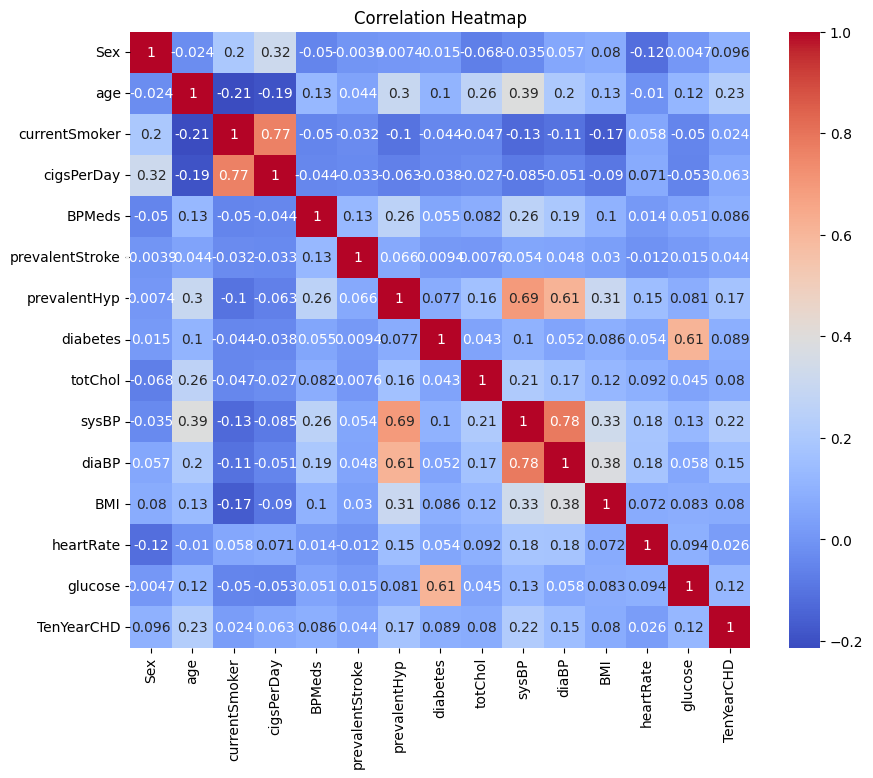

In [239]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
corr = df.corr()
print(np.round(corr['TenYearCHD'].sort_values(ascending=False),2))
plt.title("Correlation Heatmap")
plt.show()

In [240]:
# Define X (Features) , y (Target)
X = df.drop('TenYearCHD', axis = 1)
y = df['TenYearCHD']

In [241]:
# Count Number of Samples for each category in the Target.
Counter(y)

Counter({0: 3506, 1: 614})

**Problem: There is high imbalanced Data.**

**Solution: We will use SMOTE to Oversample Minority Class (1 which is the patient).**


In [242]:
# OverSample minority class to be equal for Majority.
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_SMOTE, y_SMOTE = smote.fit_resample(X, y)

In [243]:
# Count again.
Counter(y_SMOTE)

Counter({0: 3506, 1: 3506})

**Imbalanced Data Problem is solved by SMOTE**

In [244]:
# Split The Data to train & test.
X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.2, random_state=42)

In [245]:
# Apply Standarization (to make data has specific scale).
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [246]:
# Save Scaler for further deployment.
joblib.dump(scaler, 'Scaler_HDC.pkl')

['Scaler_HDC.pkl']

In [247]:
# Trying Basline Logistic Regression for training and evaluation.
LR_Basline_model = LogisticRegression(max_iter=1000)
LR_Basline_model.fit(X_train, y_train)
y_pred = LR_Basline_model.predict(X_test)

print("📌 Original Results (no Balanced Weights & threshold = 0.5)")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

📌 Original Results (no Balanced Weights & threshold = 0.5)
[[476 219]
 [239 469]]
              precision    recall  f1-score   support

           0       0.67      0.68      0.68       695
           1       0.68      0.66      0.67       708

    accuracy                           0.67      1403
   macro avg       0.67      0.67      0.67      1403
weighted avg       0.67      0.67      0.67      1403



In [248]:
# Save Basline Logistic Regression.
joblib.dump(LR_Basline_model, 'LR_Basline_model.pkl')

['LR_Basline_model.pkl']

In [249]:
# Trying Logistic Regression but with setting balanced class weights.
LR_WeightBalanced_model = LogisticRegression(class_weight="balanced", max_iter=2000)
LR_WeightBalanced_model.fit(X_train, y_train)
y_pred = LR_WeightBalanced_model.predict(X_test)

print('Evaluate logistic regression Model(Balanced Weights & threshold = 0.5):')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Evaluate logistic regression Model(Balanced Weights & threshold = 0.5):
[[474 221]
 [237 471]]
              precision    recall  f1-score   support

           0       0.67      0.68      0.67       695
           1       0.68      0.67      0.67       708

    accuracy                           0.67      1403
   macro avg       0.67      0.67      0.67      1403
weighted avg       0.67      0.67      0.67      1403



In [250]:
# Save Logistic Regression but with setting balanced class weights.
joblib.dump(LR_WeightBalanced_model, 'LR_WeightBalanced_model.pkl')

['LR_WeightBalanced_model.pkl']

In [251]:
# Trying Logistic Regression with another threshold which equal to 0.40
y_prob = LR_WeightBalanced_model.predict_proba(X_test)[:,1]
threshold = 0.40
y_pred_adj = (y_prob >= threshold).astype(int)

print("\n📌Evaluation of logistic Regression (threshold = 0.40)")
print(confusion_matrix(y_test, y_pred_adj))
print(classification_report(y_test, y_pred_adj))


📌Evaluation of logistic Regression (threshold = 0.40)
[[375 320]
 [142 566]]
              precision    recall  f1-score   support

           0       0.73      0.54      0.62       695
           1       0.64      0.80      0.71       708

    accuracy                           0.67      1403
   macro avg       0.68      0.67      0.66      1403
weighted avg       0.68      0.67      0.66      1403



In [252]:
# Trying another Model like Support Vector Machine with balanced class weights.
SVC_model = SVC(class_weight='balanced')
SVC_model.fit(X_train, y_train)
y_pred = SVC_model.predict(X_test)

print('Evaluate SVM Model with Balanced Weights: ')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Evaluate SVM Model with Balanced Weights: 
[[506 189]
 [187 521]]
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       695
           1       0.73      0.74      0.73       708

    accuracy                           0.73      1403
   macro avg       0.73      0.73      0.73      1403
weighted avg       0.73      0.73      0.73      1403



In [253]:
# Save Support Vector Machine with balanced class weights. 
joblib.dump(SVC_model, 'SVC_model.pkl')

['SVC_model.pkl']